

# Project: Investigate the tmdb-movies Dataset

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

This document entails findings from the tmdb-movies dataset provided. The dataset consists of features such as budget, vote_counts, revenue made from the release of the movie e.t.c. 
In the cell below, I import modules needed to evaluate and establish conclusions on the dataset provided. Questions to be asked about this dataset include:
- Do larger budgets result in higher profits? Are there better correlative variables?
- Using the vote_average as an independent variable from the vote_count, analyse the correlation between profits and vote_average as user ratings
- What is the average, min and max running time of a movie?
- What year from the dataset was more money spent on movies and more profits made

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("darkgrid")

%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

### General Properties

In [2]:
# load in my data and diagnose general properties of the dataset
movies_df = pd.read_csv('tmdb-movies.csv')
movies_df.head(4)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,137999939.3,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,137999939.3,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,101199955.5,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,183999919.0,1.902723e+09


In [3]:
movies_df.shape

(10866, 21)

The dataset consists of 10866 rows or movies and 21 features of which a handful seem to be negligent to my analysis

In [4]:
#general information about the dataset

movies_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

A couple columns seem to have missing values but most of those columns seem to be comprised of strings. In the data cleaning section, invaluable columns will be dropped but not all. The release_date will need to be tranformed to datetime format as well.

In [5]:
# number of rows with missing values
len(movies_df) - len(movies_df.dropna())

8874

Due to the predominant amount of rows with missing values, its definitely more advisable to drop columns instead

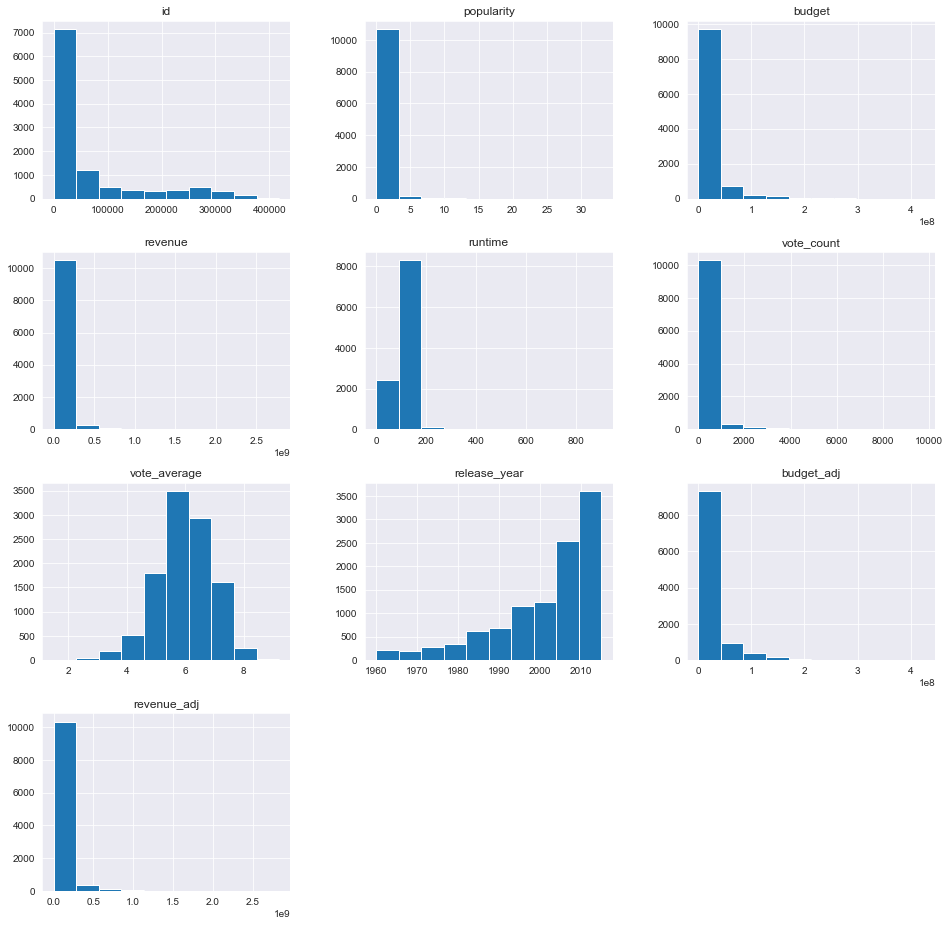

In [6]:
#distribution of frequency of numeric variables of the dataset
movies_df.hist(figsize=(16, 16));

### Data Cleaning

From the general properties of the data established above, certain columns are to be dropped for more concise dataset outlook.
A column for profit is to be created for exploratory data analysis. Release year should be converted to datetime for easier computation.

In [7]:
#columns to be dropped are: homepage, tagline, keywords, vote_count(not needed for our analysis)
movies_df.drop(['homepage','tagline', 'keywords', 'vote_count'], axis=1, inplace=True)

In [8]:
movies_df.columns

Index(['id', 'imdb_id', 'popularity', 'budget', 'revenue', 'original_title',
       'cast', 'director', 'overview', 'runtime', 'genres',
       'production_companies', 'release_date', 'vote_average', 'release_year',
       'budget_adj', 'revenue_adj'],
      dtype='object')

In [9]:
#number of columns after columns dropped
len(movies_df.columns)

17

In [10]:
#creating the profit columns
movies_df['profit'] = movies_df['revenue'] - movies_df['budget']

In [11]:
movies_df['profit']

0        1363528810
1         228436354
2         185238201
3        1868178225
4        1316249360
            ...    
10861             0
10862             0
10863             0
10864             0
10865        -19000
Name: profit, Length: 10866, dtype: int64

In [12]:
#number of columns after profit column added
len(movies_df.columns)

18

In [13]:
#convert release_date to datetime format
movies_df['release_date'] = pd.to_datetime(movies_df['release_date'])

In [14]:
#conversion confirmed
movies_df['release_date'].dtype

dtype('<M8[ns]')

<a id='eda'></a>
## Exploratory Data Analysis

### Research Question 1: Do larger budgets produce higher profits? Are there better correlative variables?

In [15]:
# looking at basic distributive data on budget and profit
movies_df.describe()[['budget', 'profit']]

,budget,profit
count,1.086600e+04,1.086600e+04
mean,1.462570e+07,2.519762e+07
std,3.091321e+07,9.658799e+07
min,0.000000e+00,-4.139124e+08
25%,0.000000e+00,0.000000e+00
50%,0.000000e+00,0.000000e+00
75%,1.500000e+07,9.083358e+06
max,4.250000e+08,2.544506e+09


looking at data on budget and profit, there are zero figures for the 25th and 50th percentile. lets look at the number of rows with a zero budget

In [16]:
(movies_df['budget'] == 0).sum()

5696

In [17]:
# function to create new DataFrame
def createNewDf(df, col):
    new_df = df.query(col)
    return new_df
    

That's a lot of movies with a zero budget. It might be a data discrepancy or what not. I'll create a new dataframe without zero figures to see the distributive data

In [18]:
movies_with_budget_df =  createNewDf(movies_df, 'budget != 0')
movies_with_budget_df.describe()[['budget', 'profit']]

,budget,profit
count,5.170000e+03,5.170000e+03
mean,3.073943e+07,4.953623e+07
std,3.890065e+07,1.351241e+08
min,1.000000e+00,-4.139124e+08
25%,6.000000e+06,-6.599420e+06
50%,1.700000e+07,2.503684e+06
75%,4.000000e+07,5.278727e+07
max,4.250000e+08,2.544506e+09


For finding the correlation between budget and profits, using the dataset with non-zero budget figures is more useful.

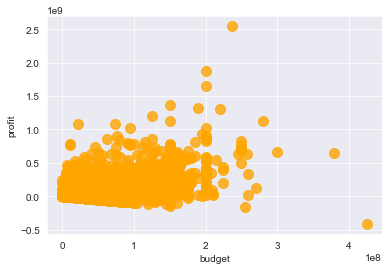

In [19]:
plt.scatter(movies_with_budget_df['budget'], movies_with_budget_df['profit'], c="orange", s=100, alpha=0.8)
plt.xlabel('budget')
plt.ylabel('profit');

From the scatter plot above there aren't definite conclusions to be made about movie budgets and profits in the dataset.

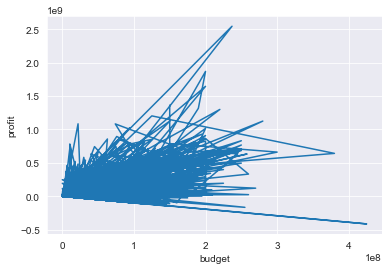

In [30]:
plt.plot(movies_with_budget_df['budget'], movies_with_budget_df['profit'])
plt.xlabel('budget')
plt.ylabel('profit');

Plotted above is a line chart of profit plotted against budget. Same as the scatter, no definite conclusions can be made from the plot.

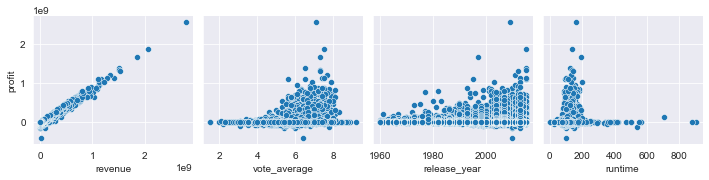

In [20]:
#plots on other numeric variables
sns.pairplot(diag_kind=None, data=movies_df,
                  y_vars=['profit'],
                  x_vars=['revenue', 'vote_average', 'release_year', 'runtime']);
    

From the plots above both vote_average and release_year seem to produce a significant boost in profits at the latter parts of their scale, with revenue producing a directly proportional increase as expected. Runtime seems to be right-skewed.

### Research Question 2: Using vote_average as user ratings, what is the relationship with profits?

In [21]:
#groupby vote_average and get the mean of profits with each vote_average variable 
movies_df.groupby('vote_average').mean()['profit']

vote_average
1.5   -9.500000e+03
2.0    0.000000e+00
2.1    3.036441e+06
2.2   -2.164210e+07
2.3    0.000000e+00
           ...     
8.6    0.000000e+00
8.7    0.000000e+00
8.8    0.000000e+00
8.9    0.000000e+00
9.2    0.000000e+00
Name: profit, Length: 72, dtype: float64

Judging from the output above, the latter part of the vote_average outputs zero figures for profit which makes this data highly inconclusive. Still, a scatter plot will be made of data with non zero profit figures

In [29]:
movies_with_profit = createNewDf(movies_df, 'profit != 0')
len(movies_with_profit['profit'])

6161

There 6161 rows with non-zero figures of profit.

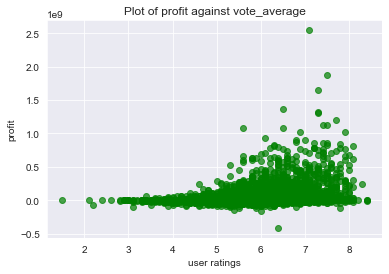

In [23]:
#scatter plot of profit against vote_average
plt.scatter(movies_with_profit['vote_average'], movies_with_profit['profit'], c="green", alpha=0.7)
plt.xlabel('user ratings')
plt.ylabel('profit')
plt.title('Plot of profit against vote_average');

As established before, there seems to be higher profits made as the user ratings increase. 

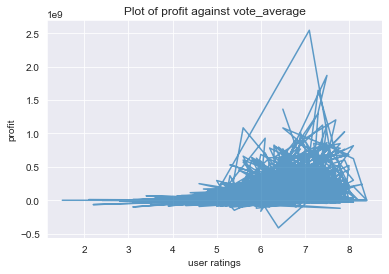

In [31]:
plt.plot(movies_with_profit['vote_average'], movies_with_profit['profit'], alpha=0.7)
plt.xlabel('user ratings')
plt.ylabel('profit')
plt.title('Plot of profit against vote_average');

A line chart of profit plotted againt user ratings, using the same data. The scatter plot seems to be of better visualization than the scatter plot.

### Research Question 3: What is the average, min and max running time of a movie? (univariate data analysis)

In [33]:
# number of unique values in the runtime column
movies_df['runtime'].nunique()

247

In [34]:
movies_df['runtime'].describe()

count    10866.000000
mean       102.070863
std         31.381405
min          0.000000
25%         90.000000
50%         99.000000
75%        111.000000
max        900.000000
Name: runtime, dtype: float64

From the data shown above, the mean runtime of movies from the dataset provided is 102 min, and the max is 900 min. The minimum value is a zero figure, lets see how many zero figures are there in this column

In [35]:
#To get sum of zero figures
(movies_df['runtime'] == 0).sum()

31

In [38]:
#I'll create a new data set without zero values for runtime
movies_with_runtime = createNewDf(movies_df, 'runtime != 0')
movies_with_runtime.describe()['runtime']

count    10835.000000
mean       102.362898
std         30.946957
min          2.000000
25%         90.000000
50%         99.000000
75%        112.000000
max        900.000000
Name: runtime, dtype: float64

From this dataset we can see that the minimum runtime is 2 min.

### Research Question 4: What year was more money spent on movies and more profits made?

In [24]:
# number of unique years recorded
movies_df['release_year'].nunique()

56

In [25]:
#Returning years with the largest profit made and budget respectively
release_year_mean = movies_df.groupby('release_year', as_index=True).mean()[['profit', 'budget']]
release_year_mean.idxmax(axis = 0)

profit    1995
budget    1999
dtype: int64

This question does not necessarily need a plot to reveal anymore insights but to be certain, I will find the max value of the release_year_mean and find 

In [26]:
release_year_mean.max()

profit    3.594547e+07
budget    2.573766e+07
dtype: float64

In [27]:
#returns True for the for year and max profit
release_year_mean.loc[[1995]]['profit'] == release_year_mean.max()['profit']

release_year
1995    True
Name: profit, dtype: bool

In [28]:
#returns True for the for profit year and max budget
release_year_mean.loc[[1999]]['budget'] == release_year_mean.max()['budget']

release_year
1999    True
Name: budget, dtype: bool

<a id='conclusions'></a>
## Conclusions

    Results: 
        1 There seems to be an increase in profit as budget increases but this occurs sparingly from the visualizations    conducted.
        2 For the other variables analyzed, there is a better coherent visualization especially in the case of revenue which is expected. For vote_average and release_year there is a sharp proportional change at the latter part of the scale.
        
        3 The most profits made from the dataset provided occur before the 2000's as well as the highest budget spent on a movie. 

    Limitations: 
        1 The data had a lot of zero figures thereby not analysis could not represent the entirety of the dataset.
        
        2 There was a disparity in the vote_average category used as user ratiings because there wasn't an equal or fair representation of the for all movies.